## Тема “Обучение без учителя”
### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.Создайте датафреймы X и y из этих
 данных.
 
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, 
чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [60]:
housing = fetch_california_housing()
data = housing['data']
X = pd.DataFrame(data, columns=housing['feature_names'])

In [61]:
y = pd.DataFrame(housing['target'], columns=['price'])

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [64]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)

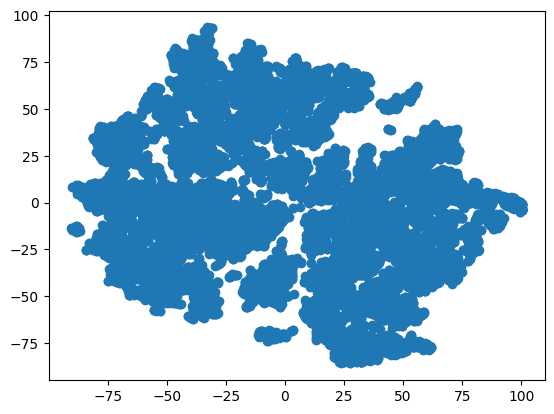

In [65]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,

используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,

и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


In [66]:
from sklearn.cluster import KMeans

In [67]:
model = KMeans(n_clusters=3, random_state=42, max_iter=100, n_init='auto')
labels_train = model.fit_predict(X_train_scaled)

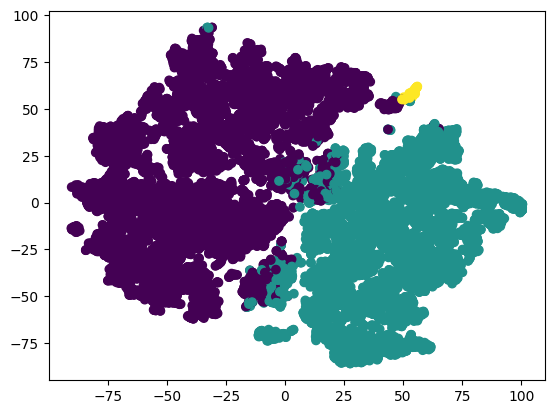

In [68]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [69]:
print('Сердний HouseAge в первом кластере: ', X_train['HouseAge'][labels_train == 0].mean())
print('Сердний HouseAge во втором кластере:', X_train['HouseAge'][labels_train == 1].mean())
print('Сердний HouseAge в третьем кластере:', X_train['HouseAge'][labels_train == 2].mean())

Сердний HouseAge в первом кластере:  28.477968240614157
Сердний HouseAge во втором кластере: 28.887975778546714
Сердний HouseAge в третьем кластере: 18.149253731343283


In [70]:
print('Средняя цена в первом кластере: ', y_train['price'][labels_train == 0].mean())
print('Средняя цена во втором кластере:', y_train['price'][labels_train == 1].mean())
print('Средняя цена в третьем кластере:', y_train['price'][labels_train == 2].mean())

Средняя цена в первом кластере:  2.142302338836891
Средняя цена во втором кластере: 1.979749117647059
Средняя цена в третьем кластере: 1.6312688059701492


### Задание 3
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [71]:
labels_test = model.fit_predict(X_test_scaled)

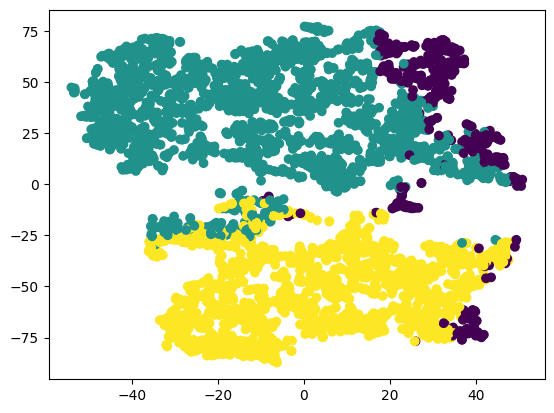

In [72]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [73]:
print('Сердний HouseAge в первом кластере: ', X_test['HouseAge'][labels_test == 0].mean())
print('Сердний HouseAge во втором кластере:', X_test['HouseAge'][labels_test == 1].mean())
print('Сердний HouseAge в третьем кластере:', X_test['HouseAge'][labels_test == 2].mean())

Сердний HouseAge в первом кластере:  19.797266514806378
Сердний HouseAge во втором кластере: 29.716899374097256
Сердний HouseAge в третьем кластере: 29.978908188585606


In [74]:
print('Средняя цена в первом кластере: ', y_test['price'][labels_test == 0].mean())
print('Средняя цена во втором кластере:', y_test['price'][labels_test == 1].mean())
print('Средняя цена в третьем кластере:', y_test['price'][labels_test == 2].mean())

Средняя цена в первом кластере:  3.3165375398633254
Средняя цена во втором кластере: 1.9222968030813672
Средняя цена в третьем кластере: 1.8824332133995036
